In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing dataset from csv files

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking columns for missing values
# train_data - Null values exist in columns Age, Cabin and Embarked

train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Passenger Class

print(train_data[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [7]:
# Sex

print(train_data[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [8]:
# Feature Engineering with the help of SibSp and Parch
# New feature can be Family Size 

train_data['family_size'] = 0
test_data['family_size'] = 0

train_data['family_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['family_size'] = test_data['SibSp'] + test_data['Parch'] + 1

print(train_data[["family_size","Survived"]].groupby(["family_size"], as_index = False).mean())

   family_size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
# Creating a new column 'is_alone' to check survival of passengers travelling alone

def check_alone(row): 
    """Check whether a passenger travelled alone (returns 1) or with family (returns 0).
    
    """
    if row['family_size'] == 1:
        return 1
    else:
        return 0
    
train_data['is_alone'] = train_data.apply(check_alone, axis = 1)
test_data['is_alone'] = test_data.apply(check_alone, axis = 1)

In [11]:
print(train_data[["is_alone", "Survived"]].groupby(["is_alone"], as_index = False).mean())

   is_alone  Survived
0         0  0.505650
1         1  0.303538


In [12]:
# Embarked
# TODO: Fill the 2 NaN values

e = train_data[train_data.Embarked.isna()]
e

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,is_alone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1


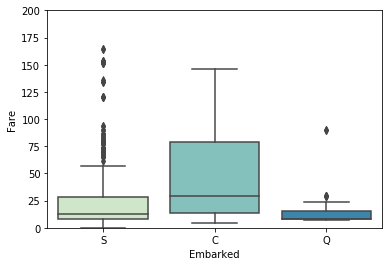

In [13]:
# Both rows have the same Fare value
# Range of values for 'C' satisfies the given fare values.
# Setting a limit on the range of the y-axis

plt.ylim(0,200)
ax = sns.boxplot(x = train_data['Embarked'], y = train_data['Fare'], palette = 'GnBu')
plt.show()

In [14]:
# Fill NaN values with 'C'
train_data['Embarked'] = train_data["Embarked"].fillna('C')

In [15]:
train_data.iloc[[61,829],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,is_alone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C,1,1


In [16]:
print(train_data[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean())

  Embarked  Survived
0        C  0.558824
1        Q  0.389610
2        S  0.336957


In [17]:
# Age
# NaN values filled with random number between (avg - avg std. deviation) and (avg + avg std. deviation)
# 177

avg = train_data['Age'].mean()
std = train_data['Age'].std()
# random = np.random.randint(avg - std, avg + std, size = 177) # to fill
random = np.array([36, 37, 34, 31, 33, 22, 22, 37, 18, 16, 38, 29, 38, 19, 42, 39, 39,
       28, 27, 20, 35, 41, 27, 38, 28, 34, 18, 31, 31, 15, 36, 21, 35, 23,
       22, 40, 24, 36, 26, 28, 15, 40, 36, 19, 23, 39, 30, 29, 33, 35, 21,
       17, 42, 25, 41, 38, 25, 21, 22, 16, 43, 17, 32, 40, 18, 39, 31, 17,
       27, 19, 41, 30, 29, 25, 42, 25, 43, 16, 41, 17, 15, 43, 27, 40, 38,
       40, 41, 36, 21, 21, 33, 36, 35, 17, 35, 30, 19, 43, 30, 28, 18, 38,
       36, 25, 16, 34, 34, 34, 36, 38, 21, 38, 23, 15, 41, 28, 28, 32, 16,
       34, 31, 15, 17, 20, 18, 37, 31, 41, 16, 23, 25, 43, 16, 35, 39, 35,
       15, 37, 43, 22, 23, 21, 29, 19, 42, 40, 37, 30, 25, 27, 39, 35, 36,
       38, 19, 31, 26, 30, 16, 20, 30, 15, 18, 43, 40, 21, 22, 31, 29, 32,
       30, 18, 35, 16, 18, 31, 23])

train_data.loc[train_data.Age.isna(), 'Age'] = random    # fill with random age values

In [18]:
# TODO: repeat for test_Data

avg = test_data['Age'].mean()
std = test_data['Age'].std()
#random = np.random.randint(avg - std, avg + std, size = 86)
random = np.array([36, 16, 29, 34, 30, 42, 27, 34, 26, 28, 26, 29, 42, 38, 33, 23, 30,
       23, 18, 35, 43, 26, 34, 23, 38, 27, 40, 37, 32, 35, 22, 23, 40, 42,
       41, 33, 21, 23, 35, 16, 23, 39, 24, 28, 36, 43, 35, 21, 36, 37, 24,
       33, 31, 37, 39, 27, 40, 35, 26, 28, 18, 33, 40, 16, 43, 25, 34, 17,
       21, 18, 27, 18, 28, 30, 21, 35, 22, 36, 19, 42, 18, 37, 23, 43, 32,
       25])
test_data.loc[test_data.Age.isna(), 'Age'] = random
test_data.Age.isna().sum()

0

In [19]:
# pd.cut() - useful for going from a continuous variable to a categorical variable. 
# Used here to convert ages to groups of age ranges.

train_data.Age = train_data['Age'].astype(int)    # convert to int to create bins easily
test_data.Age = test_data['Age'].astype(int)
train_data['category_age'] = pd.cut(train_data['Age'], 5)    # 5 bins
print(train_data[["category_age","Survived"]].groupby(["category_age"], as_index = False).mean())

    category_age  Survived
0  (-0.08, 16.0]  0.491379
1   (16.0, 32.0]  0.356979
2   (32.0, 48.0]  0.379845
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [20]:
# Fare

train_data['category_fare'] = pd.qcut(train_data['Fare'], 4)
print(train_data[['category_fare', 'Survived']].groupby(["category_fare"], as_index = False).mean())

     category_fare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [21]:
# Replace NaN in test_data Fare column

print(test_data.loc[test_data.Fare.isna(), 'Embarked'])    # Get Embarked value for NaN Fare
mean = train_data.loc[train_data.Embarked == 'S', 'Fare'].mean()    # Calculate mean for 'S' fares
test_data.loc[test_data.Fare.isna(), 'Fare'] = mean

152    S
Name: Embarked, dtype: object


In [22]:
# Name

def get_title(row):
    name = row['Name']
    title_search = re.search('([A-Za-z]+)\.', name)    # start with any letter, end with period
    if title_search:
        return title_search.group(1)    # .group() returns the strings that were matches
    return ""

train_data['Title'] = train_data.apply(get_title, axis = 1)
test_data['Title'] = test_data.apply(get_title, axis = 1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,is_alone,category_age,category_fare,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,2,0,"(16.0, 32.0]","(-0.001, 7.91]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,0,"(32.0, 48.0]","(31.0, 512.329]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,"(16.0, 32.0]","(7.91, 14.454]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2,0,"(32.0, 48.0]","(31.0, 512.329]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,1,"(32.0, 48.0]","(7.91, 14.454]",Mr


In [23]:
print(train_data[['Title','Survived']].groupby(['Title'], as_index = False).mean())

       Title  Survived
0       Capt  0.000000
1        Col  0.500000
2   Countess  1.000000
3        Don  0.000000
4         Dr  0.428571
5   Jonkheer  0.000000
6       Lady  1.000000
7      Major  0.500000
8     Master  0.575000
9       Miss  0.697802
10      Mlle  1.000000
11       Mme  1.000000
12        Mr  0.156673
13       Mrs  0.792000
14        Ms  1.000000
15       Rev  0.000000
16       Sir  1.000000


In [24]:
# Narrowing the titles down further

train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Other')
train_data['Title'] = train_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_data['Title'] = train_data['Title'].replace(['Mme'], 'Mrs')

test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Other')
test_data['Title'] = test_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_data['Title'] = test_data['Title'].replace(['Mme'], 'Mrs')

In [25]:
train_data.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

In [26]:
print(train_data[['Title','Survived']].groupby(['Title'], as_index = False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4   Other  0.347826


In [27]:
# Label Encoding

# Sex
sex_map = {'female': 0, 'male': 1}
train_data['Sex'] = train_data.Sex.map(sex_map).astype(int)
test_data['Sex'] = test_data.Sex.map(sex_map).astype(int)

# Title
title_map = {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4}
train_data["Title"] = train_data.Title.map(title_map).astype(int)
test_data["Title"] = test_data.Title.map(title_map).astype(int)

# Embarked
emb_map = {'C': 0, 'Q': 1, 'S': 2}
train_data["Embarked"] = train_data.Embarked.map(emb_map).astype(int)
test_data["Embarked"] = test_data.Embarked.map(emb_map).astype(int)

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,is_alone,category_age,category_fare,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,2,2,0,"(16.0, 32.0]","(-0.001, 7.91]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0,2,0,"(32.0, 48.0]","(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,"(16.0, 32.0]","(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2,2,0,"(32.0, 48.0]","(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,2,1,1,"(32.0, 48.0]","(7.91, 14.454]",2


In [29]:
# One Hot Encoding
# 1. Cast to pandas categorical datatype
# 2. get dummies
# 3. Avoiding dummy variable trap by dropping first column for each category

categories = ['Pclass', 'Sex', 'Embarked', 'is_alone', 'Title']

for category in categories:
    train_data[category] = pd.Categorical(train_data[category])
    test_data[category] = pd.Categorical(test_data[category])
    train_data = pd.concat([train_data, pd.get_dummies(train_data[category], prefix = category, drop_first = True)], axis = 1)
    test_data = pd.concat([test_data, pd.get_dummies(test_data[category], prefix = category, drop_first = True)], axis = 1)

# Dropping unecessary rows
# Remember, the submissions file must contain passenger id

passenger_ids = test_data['PassengerId']
train_data = train_data.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'category_age', 'category_fare', 'Embarked', 'is_alone', 'Title'], axis = 1)
test_data = test_data.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'is_alone', 'Title'], axis = 1)
train_data.head()    

,Survived,Age,Fare,family_size,Pclass_2,Pclass_3,Sex_1,Embarked_1,Embarked_2,is_alone_1,Title_1,Title_2,Title_3,Title_4
0,0,22,7.2500,2,0,1,1,0,1,0,0,1,0,0
1,1,38,71.2833,2,0,0,0,0,0,0,0,0,1,0
2,1,26,7.9250,1,0,1,0,0,1,1,1,0,0,0
3,1,35,53.1000,2,0,0,0,0,1,0,0,0,1,0
4,0,35,8.0500,1,0,1,1,0,1,1,0,1,0,0


In [30]:
test_data.head()

,Age,Fare,family_size,Pclass_2,Pclass_3,Sex_1,Embarked_1,Embarked_2,is_alone_1,Title_1,Title_2,Title_3,Title_4
0,34,7.8292,1,0,1,1,1,0,1,0,1,0,0
1,47,7.0000,2,0,1,0,0,1,0,0,0,1,0
2,62,9.6875,1,1,0,1,1,0,1,0,1,0,0
3,27,8.6625,1,0,1,1,0,1,1,0,1,0,0
4,22,12.2875,3,0,1,0,0,1,0,0,0,1,0


In [31]:
# Split data into train and test sets

X_train = train_data.drop(['Survived'], axis = 1)
y_train = train_data["Survived"]
X_test = test_data.copy()

In [38]:
# Performing hyperparameter optimisation

rf = RandomForestClassifier()
grid_params = {"criterion": ['gini', 'entropy'],
              "n_estimators": [30, 50, 100, 200, 500],
              "min_samples_leaf": [1, 5, 10],
              "min_samples_split": [2,4,8,10]}
grid_cv = GridSearchCV(estimator = rf, param_grid = grid_params, scoring = 'accuracy', cv = 3, verbose = 3)
grid_cv = grid_cv.fit(X_train, y_train)
print("Best accuracy: ",grid_cv.best_score_)
print("Best params: ", grid_cv.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.7542087542087542, total=   0.0s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.797979797979798, total=   0.0s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.8013468013468014, total=   0.0s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.7609427609427609, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.8114478114478114, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.8181818181818182, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.7542087542087542, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.797979797979798, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.8080808080808081, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=200 

[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.8047138047138047, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.8518518518518519, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.835016835016835, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.8080808080808081, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.8686868686868687, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimat

[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estimators=500, score=0.8249158249158249, total=   0.5s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=8, n_estimators=30 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=8, n_estimators=30, score=0.7912457912457912, total=   0.0s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=8, n_estimators=30 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=8, n_estimators=30, score=0.8451178451178452, total=   0.0s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=8, n_estimators=30 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=8, n_estimators=30, score=0.8181818181818182, total=   0.0s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.8080808080808081, total=   0.1s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]

[CV]  criterion=gini, min_samples_leaf=10, min_samples_split=2, n_estimators=200, score=0.8451178451178452, total=   0.2s
[CV] criterion=gini, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  criterion=gini, min_samples_leaf=10, min_samples_split=2, n_estimators=200, score=0.8047138047138047, total=   0.2s
[CV] criterion=gini, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  criterion=gini, min_samples_leaf=10, min_samples_split=2, n_estimators=500, score=0.8013468013468014, total=   0.5s
[CV] criterion=gini, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  criterion=gini, min_samples_leaf=10, min_samples_split=2, n_estimators=500, score=0.8383838383838383, total=   0.6s
[CV] criterion=gini, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  criterion=gini, min_samples_leaf=10, min_samples_split=2, n_estimators=500, score=0.8215488215488216, total=   0.5s
[CV] criterion=gini, min_samples_leaf=10, min_samples_split=4, n_e

[CV]  criterion=gini, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.835016835016835, total=   0.1s
[CV] criterion=gini, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.8080808080808081, total=   0.1s
[CV] criterion=gini, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  criterion=gini, min_samples_leaf=10, min_samples_split=10, n_estimators=200, score=0.8047138047138047, total=   0.2s
[CV] criterion=gini, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  criterion=gini, min_samples_leaf=10, min_samples_split=10, n_estimators=200, score=0.835016835016835, total=   0.2s
[CV] criterion=gini, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  criterion=gini, min_samples_leaf=10, min_samples_split=10, n_estimators=200, score=0.8215488215488216, total=   0.2s
[CV] criterion=gini, min_samples_leaf=10, min_samples_split

[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=50, score=0.8518518518518519, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=50, score=0.8417508417508418, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.8114478114478114, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.8619528619528619, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.8316498316498316, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=1, min_sam

[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=500, score=0.8181818181818182, total=   0.5s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=30 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=30, score=0.8114478114478114, total=   0.0s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=30 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=30, score=0.8316498316498316, total=   0.0s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=30 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=30, score=0.835016835016835, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.8114478114478114, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_s

[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=0.8114478114478114, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=0.8552188552188552, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=0.8282828282828283, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.8114478114478114, total=   0.5s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.8552188552188552, total=   0.5s
[CV] criterion=entropy, min_samples_lea

[CV]  criterion=entropy, min_samples_leaf=10, min_samples_split=8, n_estimators=50, score=0.8383838383838383, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=10, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=10, min_samples_split=8, n_estimators=50, score=0.8047138047138047, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=10, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=10, min_samples_split=8, n_estimators=100, score=0.8114478114478114, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=10, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=10, min_samples_split=8, n_estimators=100, score=0.8451178451178452, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=10, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=10, min_samples_split=8, n_estimators=100, score=0.8080808080808081, total=   0.1s
[CV] criterion=entropy, min_samples_leaf=1

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.3min finished


In [39]:
# Fit Random Forest Classifier to train set

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', min_samples_leaf = 1, min_samples_split = 10, random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
# Predict test set results
y_pred = classifier.predict(X_test)

In [41]:
# Creating the submissions file

submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_pred
})

submission.to_csv('submissions3.csv', index = False)